In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/ISIC 2024 - Skin Cancer Detection with 3D-TBP/Data/train-metadata.csv')
df.info()

C:\Users\sr1ja\AppData\Local\Temp\ipykernel_18860\3194197590.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/ISIC 2024 - Skin Cancer Detection with 3D-TBP/Data/train-metadata.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

In [32]:
df_sample = df.sample(50000)
df_sample['target'].value_counts()

target
0    49944
1       56
Name: count, dtype: int64

In [33]:
df_sample.to_csv("isic2024_50ksample.csv", index=False)

In [21]:
df.iloc[:, 1].unique()

array([0, 1], dtype=int64)

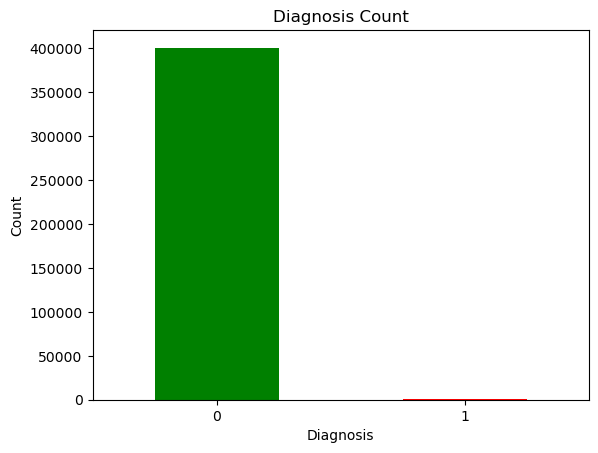

In [17]:
diagnosis_counts = df['target'].value_counts()
diagnosis_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [16]:
diagnosis_counts

target
0    400666
1       393
Name: count, dtype: int64

In [10]:
df_good_confidende = df[df['tbp_lv_dnn_lesion_confidence'] > 99]
#df_good_confidende = df_good_confidende.reset_index(drop=True)
df_good_confidende.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324584 entries, 2 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       324584 non-null  object 
 1   target                        324584 non-null  int64  
 2   patient_id                    324584 non-null  object 
 3   age_approx                    322316 non-null  float64
 4   sex                           314666 non-null  object 
 5   anatom_site_general           320104 non-null  object 
 6   clin_size_long_diam_mm        324584 non-null  float64
 7   image_type                    324584 non-null  object 
 8   tbp_tile_type                 324584 non-null  object 
 9   tbp_lv_A                      324584 non-null  float64
 10  tbp_lv_Aext                   324584 non-null  float64
 11  tbp_lv_B                      324584 non-null  float64
 12  tbp_lv_Bext                   324584 non-null  fl

In [11]:
df_good_confidende

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
5,ISIC_0035502,0,IP_3026693,75.0,female,head/neck,2.54,TBP tile: close-up,3D: white,22.129183,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.619603
6,ISIC_0051648,0,IP_0218255,65.0,male,upper extremity,3.74,TBP tile: close-up,3D: XP,14.319188,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.918133
7,ISIC_0051665,0,IP_7734648,50.0,male,posterior torso,4.31,TBP tile: close-up,3D: XP,20.102610,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.972390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,ISIC_9999937,0,IP_1140263,70.0,male,anterior torso,6.80,TBP tile: close-up,3D: XP,22.574335,...,IL_9520694,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999988
401055,ISIC_9999951,0,IP_5678181,60.0,male,posterior torso,3.11,TBP tile: close-up,3D: white,19.977640,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999820
401056,ISIC_9999960,0,IP_0076153,65.0,female,anterior torso,2.05,TBP tile: close-up,3D: XP,17.332567,...,IL_9852274,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999416
401057,ISIC_9999964,0,IP_5231513,30.0,female,anterior torso,2.80,TBP tile: close-up,3D: XP,22.288570,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


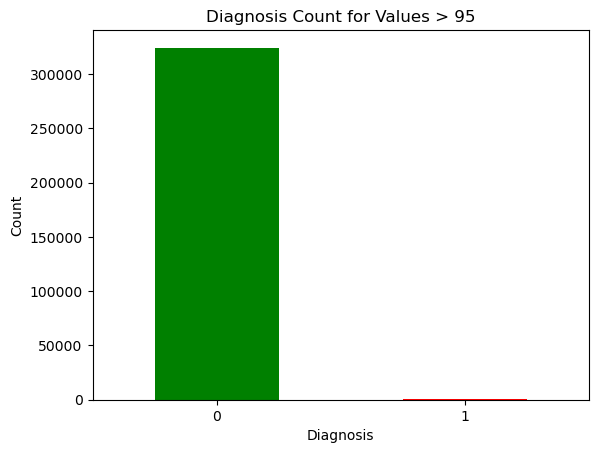

In [13]:
diagnosis_counts = df_good_confidende['target'].value_counts()
diagnosis_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Diagnosis Count for Values > 95')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [14]:
diagnosis_counts

target
0    324361
1       223
Name: count, dtype: int64